In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"D:\Air Quality Prediction and Forecasting using Machine Learning\data\raw\city_day.csv")


In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Convert Date column

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.sort_values(by = 'Date')

In [8]:
df['Date'].min(), df['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

In [9]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

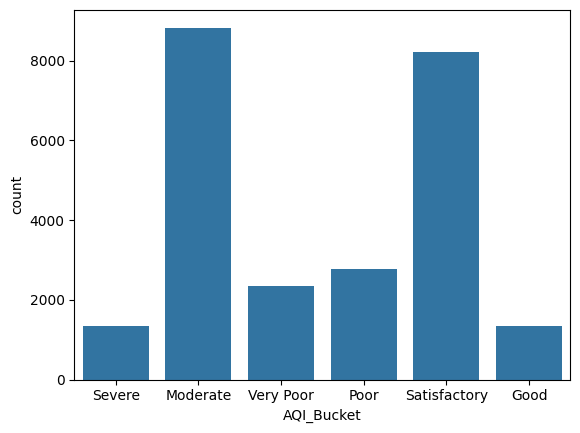

In [10]:
sns.countplot(x=df["AQI_Bucket"]);

In [11]:
#delete AQI_Bucket column for regression task 
df_AQI_BUCKET = df["AQI_Bucket"]
df = df.drop(["AQI_Bucket"], axis=1)

In [12]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN


<Axes: >

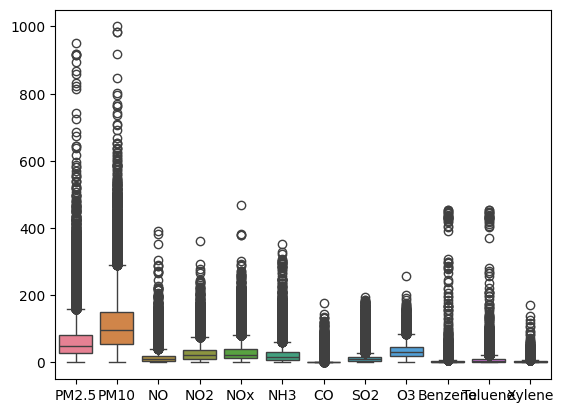

In [13]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']])

identifies outliers

In [14]:
def replace_outliers_with_quartiles(df):
    
    for column in df.select_dtypes(include=['number']).columns: 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df

df = replace_outliers_with_quartiles(df)

In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,24933.0,54.975923,0.04,28.82,48.57,80.59,158.21,32.781561
PM10,18391.0,104.818086,0.01,56.255,95.68,149.7425,289.95,60.357602
NO,25949.0,12.472491,0.02,5.63,9.89,19.95,41.43,8.941774
NO2,25946.0,25.482607,0.01,11.75,21.69,37.62,76.4,16.698364
NOx,25346.0,26.520383,0.0,12.82,23.52,40.125625,81.06,17.876378
NH3,19203.0,19.661227,0.01,8.58,15.85,30.02,62.16,13.838362
CO,27472.0,0.952485,0.0,0.51,0.89,1.45,2.86,0.61346
SO2,25677.0,10.304869,0.01,5.67,9.16,15.22,29.54,5.908036
O3,25509.0,32.836577,0.01,18.86,30.84,45.57,85.63,17.969539


<Axes: >

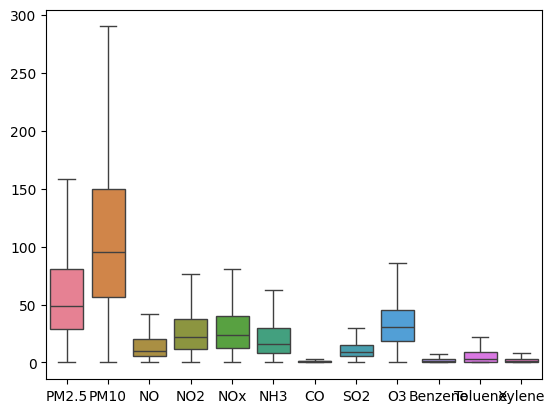

In [16]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']])

In [17]:
df1=df.drop(columns=['City'])

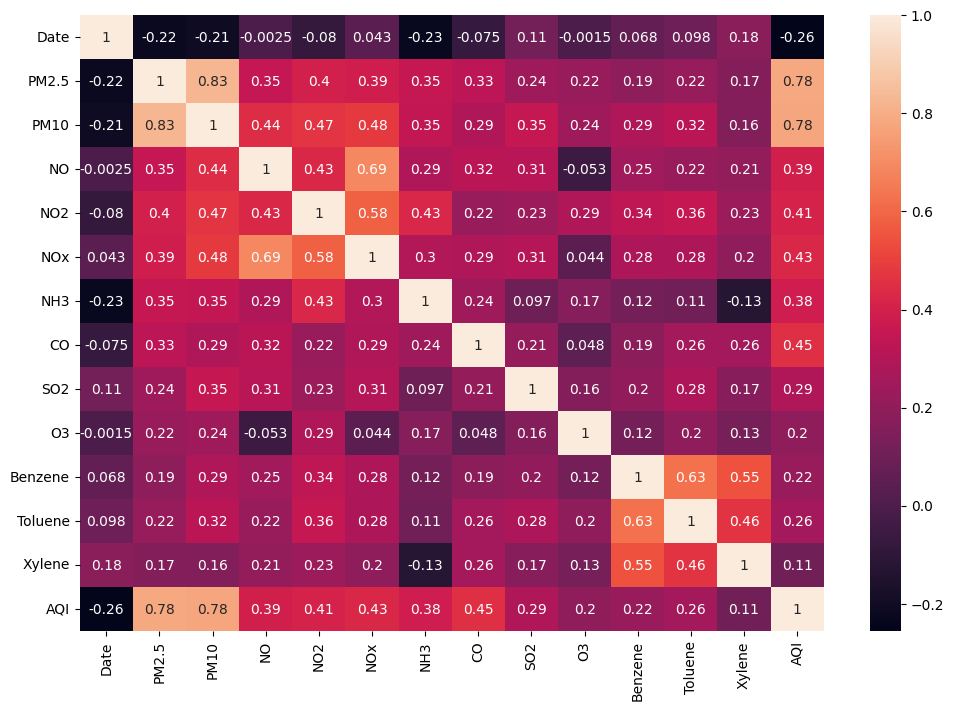

In [18]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df1.corr(),annot=True) 
plt.show() 

In [19]:
#remove the Xylene, Benzene, O3 columns
df=df.drop(columns=['Xylene', 'Benzene','O3']) 

In [20]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.1500,NaN,0.92,27.64,0.02,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.6800,4.59,1.17,9.20,NaN,NaN
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.5700,NaN,1.45,15.22,3.93,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.3800,NaN,0.00,NaN,0.00,NaN


In [21]:
#removed rows with missing target values
df_full=df[df['AQI'].notna()]

In [22]:
df_full['Year'] = df_full['Date'].dt.year

C:\Users\Anand B Patil\AppData\Local\Temp\ipykernel_4680\3473639028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['Year'] = df_full['Date'].dt.year


In [23]:
df_full.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,2015
10230,Delhi,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,2015
10231,Delhi,2015-01-03,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,2015
10232,Delhi,2015-01-04,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,2015
10233,Delhi,2015-01-05,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,2015


In [24]:
df_full.isnull().sum()


City          0
Date          0
PM2.5       678
PM10       7086
NO          387
NO2         391
NOx        1857
NH3        6536
CO          445
SO2         605
Toluene    5826
AQI           0
Year          0
dtype: int64

In [25]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 10229 to 29530
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     24850 non-null  object        
 1   Date     24850 non-null  datetime64[ns]
 2   PM2.5    24172 non-null  float64       
 3   PM10     17764 non-null  float64       
 4   NO       24463 non-null  float64       
 5   NO2      24459 non-null  float64       
 6   NOx      22993 non-null  float64       
 7   NH3      18314 non-null  float64       
 8   CO       24405 non-null  float64       
 9   SO2      24245 non-null  float64       
 10  Toluene  19024 non-null  float64       
 11  AQI      24850 non-null  float64       
 12  Year     24850 non-null  int32         
dtypes: datetime64[ns](1), float64(10), int32(1), object(1)
memory usage: 2.6+ MB


<Axes: title={'center': 'AQI over the Years'}, xlabel='Year', ylabel='AQI'>

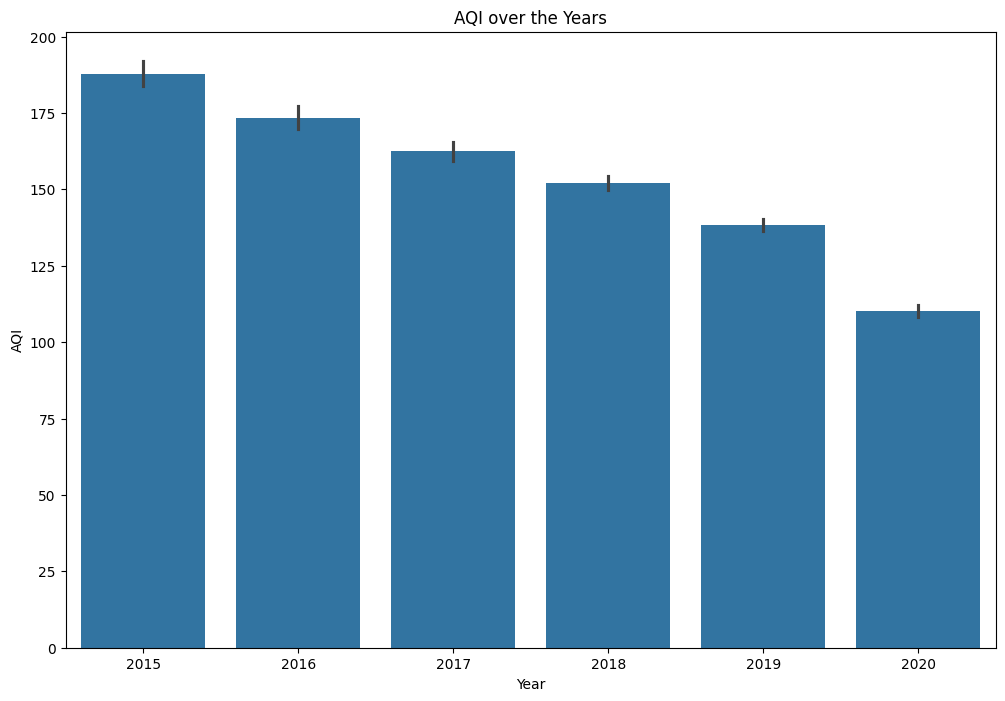

In [26]:
plt.figure(figsize=(12, 8))
plt.title('AQI over the Years')
sns.barplot(x='Year', y='AQI', data=df_full)

In [27]:
#imputer object and specified that it fills empty values ​​with the average
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy = 'mean') 
imputer.fit(df_full.select_dtypes(include=['number']))
df_full[df_full.select_dtypes(include=['number']).columns] = imputer.transform(df_full.select_dtypes(include=['number'])) 

C:\Users\Anand B Patil\AppData\Local\Temp\ipykernel_4680\706902868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full[df_full.select_dtypes(include=['number']).columns] = imputer.transform(df_full.select_dtypes(include=['number']))


In [28]:
df_full.isnull().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
Toluene    0
AQI        0
Year       0
dtype: int64

In [29]:
df_full.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,2015.0
10230,Delhi,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,2015.0
10231,Delhi,2015-01-03,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,2015.0
10232,Delhi,2015-01-04,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,2015.0
10233,Delhi,2015-01-05,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,2015.0


In [30]:
#converted to scalar values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_full[df_full.select_dtypes(include=['number']).columns] = scaler.fit_transform(df_full.select_dtypes(include=['number']))

C:\Users\Anand B Patil\AppData\Local\Temp\ipykernel_4680\3501307257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full[df_full.select_dtypes(include=['number']).columns] = scaler.fit_transform(df_full.select_dtypes(include=['number']))


In [31]:
df_full.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
2683,Amaravati,2019-06-08,-7.185092e-01,-6.710403e-01,-1.087345,0.022604,-0.615258,-1.048450,-0.739376,1.183360,-8.901388e-01,-0.868589,0.619182
9274,Chennai,2018-12-11,9.117840e-01,-2.791304e-16,-0.194095,-0.377908,0.171754,1.838187,0.217498,0.247484,-1.181285e+00,0.561290,-0.055731
11100,Delhi,2017-05-21,7.861864e-01,8.727271e-01,0.841443,1.596993,0.612106,-0.585308,-0.217445,0.844925,2.007567e+00,0.698559,-0.730644
23560,Mumbai,2019-09-02,-1.331957e+00,-1.258927e+00,1.325899,-0.991908,0.313463,-0.854773,-0.513206,0.097260,-2.036139e-16,-0.914345,0.619182
18460,Jorapokhar,2019-05-19,-2.198089e-16,-5.184215e-01,-0.504643,-1.094141,0.000000,-1.126763,2.531393,0.430515,-2.036139e-16,-0.193686,0.619182
19754,Kolkata,2020-04-01,-1.542483e-01,-5.262784e-01,-0.842294,-0.806686,-0.543818,-0.063221,-0.756773,0.228490,2.973706e-01,-0.342394,1.294094
25300,Patna,2019-05-07,7.373086e-01,-2.791304e-16,-0.081168,-0.860809,-0.974801,0.000000,0.739429,0.844925,2.328516e+00,0.721437,0.619182
15079,Hyderabad,2016-05-16,-8.286391e-01,-6.288099e-01,-0.415431,0.231881,-0.054278,0.641597,-0.374024,-0.969846,-7.090321e-01,-0.628369,-1.405557
12585,Gurugram,2016-05-30,-1.592433e+00,-2.791304e-16,-1.195755,-1.196374,-1.278714,0.000000,-1.069932,-1.425697,-2.036139e-16,-0.971540,-1.405557
27472,Thiruvananthapuram,2018-11-13,-3.562562e-01,-8.965311e-01,-0.933765,-1.201185,-1.226598,-1.235391,0.321884,-1.075175,-2.036139e-16,-0.742760,-0.055731


In [32]:
#converted the names of the one-hot encoded categorical columns created using the encoder object into a list.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cities = encoder.fit_transform(df_full[['City']])
encoded_city_cols = encoder.get_feature_names_out(['City'])
encoded_city_df = pd.DataFrame(encoded_cities, columns=encoded_city_cols, index=df_full.index)
df_full = pd.concat([df_full, encoded_city_df], axis=1)

In [33]:
df_full.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
11333,Delhi,2018-01-09,7.861864e-01,0.872727,0.841443,2.427485,-0.961333,3.257085,0.930804,1.984553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23309,Mumbai,2018-12-25,1.030266e+00,1.918765,0.841443,0.721998,0.781776,0.000000,2.983733,2.072615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27337,Thiruvananthapuram,2018-07-01,-1.155626e+00,-1.402903,-1.043304,-1.087526,-1.172725,-1.391175,-0.565399,-0.674579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6196,Bengaluru,2020-03-17,-9.598050e-01,-0.537278,-0.875043,-0.363476,-0.260400,-0.799196,-0.252240,-0.572703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16920,Jaipur,2018-05-13,6.568766e-01,2.329873,-0.261851,0.398461,0.439947,-0.646780,1.470133,0.076539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5459,Bengaluru,2018-03-11,-3.089251e-01,0.359578,-1.099767,-0.210727,-0.375172,0.000000,0.043521,-1.144244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15889,Hyderabad,2018-08-04,-9.820784e-01,-0.572634,-0.775667,-0.026107,-0.535034,-0.145745,-1.261307,-0.638318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18176,Jorapokhar,2018-08-08,-2.198089e-16,-0.012049,-0.627733,-1.115790,0.000000,-1.122553,-1.139523,2.839274,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11472,Delhi,2018-05-28,1.929866e+00,0.872727,1.904083,1.695016,1.799651,2.390589,0.565452,0.900180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23853,Mumbai,2020-06-21,-1.420123e+00,-1.263248,-0.061971,-0.955224,-0.297877,-0.893508,-1.191716,0.190502,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Data Modeling**

In [34]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X = df_full.drop(columns=['AQI', 'Date', 'City'])
y = df_full['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19880, 35), (4970, 35), (19880,), (4970,))

In [35]:
X_train


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Year,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
14922,-0.938150,-8.022492e-01,-0.442534,-0.822923,-0.438415,-0.797512,-0.165251,-0.308517,1.310192e-02,-2.080470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16694,0.732978,5.950866e-01,0.797402,1.738315,0.000000,0.846221,-1.348295,-0.425933,-1.046028e+00,-0.730644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7217,-0.710466,-1.042472e+00,-1.225116,-1.116391,-1.289254,1.103054,1.591917,-0.674579,-2.036139e-16,0.619182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14012,-0.183018,2.849386e-01,-0.083427,-0.714676,-0.910973,1.972919,-0.582796,-0.265349,-6.173326e-01,1.294094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2321,-1.161194,-1.129486e+00,-0.965384,-0.948008,-1.061466,-0.861509,-0.895955,-0.779908,-2.036139e-16,-0.055731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,-0.423386,-5.013329e-01,0.466526,-0.463904,0.455758,2.404904,-0.078263,-0.203187,-1.169822e+00,1.294094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20702,0.786186,-2.791304e-16,0.355858,0.709370,0.000000,0.000000,0.982997,-0.035697,-5.237995e-03,-0.730644,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.147681,-2.791304e-16,-1.391118,-1.024983,-1.090159,0.000000,-1.435284,0.206043,-9.107712e-01,-2.080470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17286,-0.252313,-1.322785e-02,-0.264109,0.205421,0.360895,0.133825,-0.443615,0.066179,-2.940916e-01,0.619182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
y_train

14922   -0.525418
16694   -0.090735
7217    -0.513979
14012   -0.388150
2321    -0.994418
           ...   
9708    -0.708443
20702    2.277145
206     -0.639808
17286   -0.536857
17652   -0.262320
Name: AQI, Length: 19880, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("📌 Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

📌 Linear Regression Results:
MAE: 0.37296657156478785
RMSE: 0.5426221187586835
R² Score: 0.705583624813662


Random Forest Regressor

In [39]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📌 Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


📌 Random Forest Results:
MAE: 0.24280821160126342
RMSE: 0.38457417200730953
R² Score: 0.8521139520619729


Feature Importance (RF)

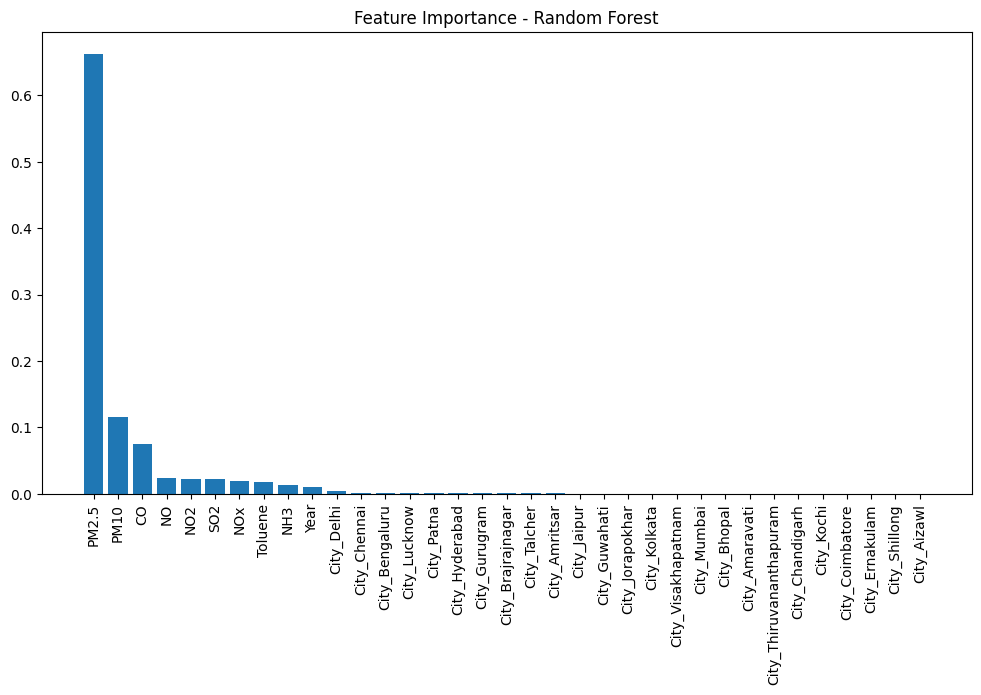

In [40]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

XGBoost

In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("📌 XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

📌 XGBoost Results:
MAE: 0.24162744630244462
RMSE: 0.3821932481552539
R² Score: 0.8539394280852364


Compare Models (Visualization)

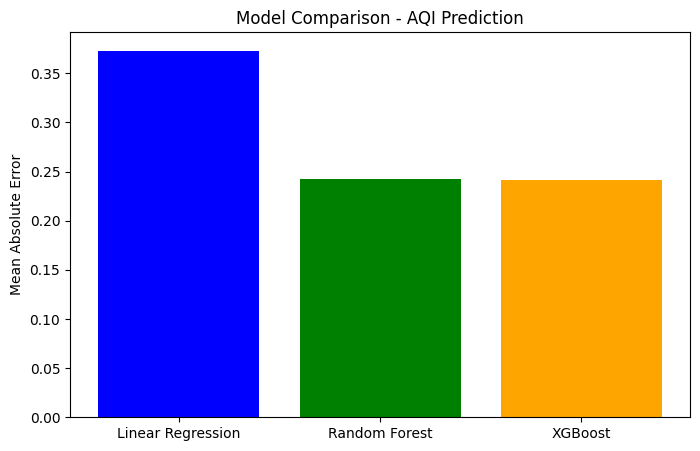

In [42]:
models = ["Linear Regression", "Random Forest", "XGBoost"]
mae_scores = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_xgb),
]

plt.figure(figsize=(8,5))
plt.bar(models, mae_scores, color=["blue","green","orange","purple"])
plt.ylabel("Mean Absolute Error")
plt.title("Model Comparison - AQI Prediction")
plt.show()

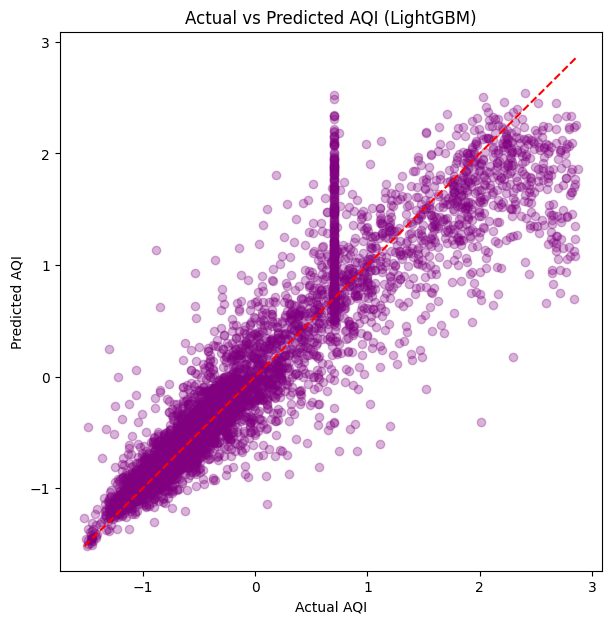

In [43]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (LightGBM)")
plt.show()

Optuna Hyperparameter Tuning

In [44]:
import optuna
from sklearn.model_selection import cross_val_score, KFold


d:\Air Quality Prediction and Forecasting using Machine Learning\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10)
    }

    model = XGBRegressor(**params, random_state=42, n_jobs=-1)
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error")
    return -scores.mean()

study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=30, n_jobs=-1)

print(" Best XGBoost params:", study_xgb.best_params)
print(" Best XGBoost RMSE:", study_xgb.best_value)

best_xgb = XGBRegressor(**study_xgb.best_params, random_state=42, n_jobs=-1)
best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)

print("\n📌 Tuned XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best_xgb))
print("RMSE:", np.sqrt(mean_absolute_error(y_test, y_pred_best_xgb)))
print("R² Score:", r2_score(y_test, y_pred_best_xgb))

[I 2025-09-05 09:41:45,331] A new study created in memory with name: no-name-dacf6cb1-2e95-4f18-9dc5-a3b648562428
[I 2025-09-05 09:41:50,023] Trial 2 finished with value: 0.4086439215271987 and parameters: {'n_estimators': 251, 'learning_rate': 0.11201619444216983, 'max_depth': 11, 'subsample': 0.8039290705466058, 'colsample_bytree': 0.9427628385117504, 'gamma': 3.838221855870833, 'min_child_weight': 10}. Best is trial 2 with value: 0.4086439215271987.
[I 2025-09-05 09:41:53,024] Trial 6 finished with value: 0.4020158303730513 and parameters: {'n_estimators': 219, 'learning_rate': 0.03461123241153922, 'max_depth': 9, 'subsample': 0.902826125816026, 'colsample_bytree': 0.7374904980927188, 'gamma': 2.7874946829696725, 'min_child_weight': 7}. Best is trial 6 with value: 0.4020158303730513.
[I 2025-09-05 09:41:54,717] Trial 4 finished with value: 0.400773930278469 and parameters: {'n_estimators': 306, 'learning_rate': 0.03994634566812417, 'max_depth': 5, 'subsample': 0.6640670897530545, 'c

 Best XGBoost params: {'n_estimators': 971, 'learning_rate': 0.010608418730718714, 'max_depth': 10, 'subsample': 0.751606663681362, 'colsample_bytree': 0.7094821808983858, 'gamma': 0.035898871064456994, 'min_child_weight': 4}
 Best XGBoost RMSE: 0.38279494261802466

📌 Tuned XGBoost Performance:
MAE: 0.23989969893127078
RMSE: 0.4897955685092208
R² Score: 0.8571669239942032


In [48]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=706,
    learning_rate=0.01886151106111373,
    max_depth=9,
    subsample=0.9795171714335502,
    colsample_bytree=0.7953160787018473,
    gamma=0.08480261370446751,
    min_child_weight=7,
    random_state=42  
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(" XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

 XGBoost Results:
MAE: 0.24109911418194813
RMSE: 0.3775039941688657
R² Score: 0.857501570527923


**Model Saved**

In [50]:
import joblib

joblib.dump(xgb, "models/xgboost_aqi_model.joblib")

['models/xgboost_aqi_model.joblib']